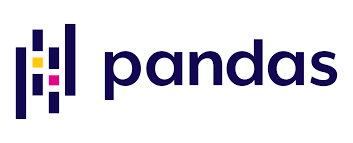

https://pandas.pydata.org/

Pandas data-manipulation capabilities are built on top of NumPy, utilizing its fast array processing, and its graphing capabilities are built on top of Matplotlib.

* "pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language."

* It may be one of the most widely used tools for data munging
  * present data in nice formats
  * multiple convenient methods for filtering data
  * work with a variety of data formats (CSV, Excel, …)
  * convenient functions for quickly plotting data

* Name comes from panel data, also play on python data analysis

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
titles = pd.Series(['And Now for Something Completely Different',
          'Monty Python and the Holy Grail',
          'Monty Python\'s Life of Brian',
          'Monty Python Live at the Hollywood Bowl',
          'Monty Python\'s The Meaning of Life',
          'Monty Python Live (Mostly)'])

In [ ]:
titles

In [ ]:
titles[0:2]

In [ ]:
year = [1971,1975,1979,1982,1983,2014]

In [ ]:
production_budget = ['100000', '400000', '4000000', None, '9000000', None]

In [ ]:
# taken from https://www.the-numbers.com but make no claims to verifying the numbers
box_office = [np.nan, 5028948, 20515486, 327958, 14929552, 2215461]

In [ ]:
df = pd.DataFrame({'Year': year,
                   'Titles': titles,
                   'Budget': production_budget,
                   'Gross': box_office})
df

In [ ]:
df.columns

In [ ]:
df.index

In [ ]:
df.dtypes

In [ ]:
df['Budget']

## Basic info

In [ ]:
df.shape

In [ ]:
df.info()

## We will come back to nulls and Dtypes

In [ ]:
df.describe()

In [ ]:
df.T

In [ ]:
df.head()

In [ ]:
df.tail(3)

In [ ]:
df.sort_index(axis=1, ascending=False)

In [ ]:
df.sort_index(axis=0, ascending=False)

In [ ]:
df.sort_values(by='Gross')

In [ ]:
df.sort_values(by='Gross',ascending=False)

# Selecting
loc, iloc, at, iat

In [ ]:
df['Titles']

In [ ]:
df[0:3]

In [ ]:
df.loc[1]

In [ ]:
df.loc[1,['Titles','Year']]

In [ ]:
df.loc[0:2,['Titles','Year']]

In [ ]:
df.loc[1,'Titles']

In [ ]:
df.at[1,'Titles']

In [ ]:
df.iloc[1]

In [ ]:
df.iloc[1,'Titles']

In [ ]:
df.iloc[1,1]

In [ ]:
df.iloc[0:2,:]

In [ ]:
df.iat[1,1]

# Boolean indexing

In [ ]:
df['Budget'] > 1000000

Something's not right...

In [ ]:
df.dtypes

In [ ]:
df['Budget'].astype(float)

In [ ]:
df['Budget'] > 1000000

In [ ]:
df.dtypes

In [ ]:
df['Budget'] = df['Budget'].astype(float)

In [ ]:
df.dtypes

In [ ]:
df['Budget'] > 1000000

In [ ]:
df[df['Budget'] > 1000000]

# Missing data

In [ ]:
df.isna()

In [ ]:
df.isnull()

In [ ]:
df[df['Budget'].isna()]

In [ ]:
df.loc[df['Budget'].isna()].info()

In [ ]:
# might want to do this
# df[df['Budget'].isna()] = 0
# but no!
# that will set entire rows to 0

In [ ]:
# df[df['Budget'].isna()] = 0

In [ ]:
# df[df['Budget'].isna()]

In [ ]:
df.iloc[3]

In [ ]:
df['Budget'].fillna(value=0)

In [ ]:
df.iloc[3]

In [ ]:
df['Budget'].fillna(value=0,inplace=True)

In [ ]:
df

In [ ]:
df['Gross']

In [ ]:
df['Gross'].isna()

In [ ]:
# preview of aggregate calculations
df['Gross'].fillna(value=df['Gross'].mean())

In [ ]:
df['Gross'] = df['Gross'].fillna(value=df['Gross'].mean())

In [ ]:
df

In [ ]:
df.info()

In [ ]:
pd.to_datetime(df['Year'])

In [ ]:
df['Year'] = pd.to_datetime(df['Year'],format='%Y')

In [ ]:
df['Year']

In [ ]:
df.dtypes

In [ ]:
df.loc[df['Gross']/df['Budget'] > 2]

In [ ]:
df['Profit Factor'] = df['Gross']/df['Budget']

In [ ]:
df

In [ ]:
df.iloc[4]

In [ ]:
df.plot(x='Year',y='Gross')

In [ ]:
df.plot(x='Year',y='Gross',kind='scatter')

# Calculating values and aggregating

In [ ]:
df['Budget'].count()

In [ ]:
df.count()

In [ ]:
df['Budget'].mean()

In [ ]:
df.groupby('Budget')['Gross'].mean()

In [ ]:
df4group = pd.DataFrame({'folks':['a','b','c','d','e','f'],
                         'python skills':[1,2,1,3,3,1],
                         'monty python knowledge':[3,1,1,2,2,3]})

In [ ]:
df4group

In [ ]:
df4group.groupby('python skills').count()

In [ ]:
df4group.groupby('python skills')['monty python knowledge'].mean()

# Final fun - estimating $\pi$ (again)

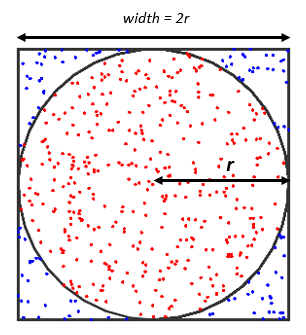

The fraction of sample points that make it into the circle is:

$$\frac{N_{inside}}{N_{total}} = \frac{\pi r^2}{4 r^2}$$

so we can use our sample to calculate $\pi$ via:

$$\pi = 4 \frac{N_{inside}}{N_{total}}$$

In [ ]:
np.random.uniform(0,1)

In [ ]:
pi_sample = pd.DataFrame(columns=['x','y','in_circle'])

In [ ]:
x = np.random.uniform(0,1,1000)
y = np.random.uniform(0,1,1000)
in_circle = (((x-0.5)**2 + (y-0.5)**2) < 0.5**2)

In [ ]:
pi_sample['x'] = x
pi_sample['y'] = y
pi_sample['in_circle'] = in_circle

In [ ]:
pi_sample

In [ ]:
pi_sample[pi_sample['in_circle'] == True]

In [ ]:
pi_sample.groupby('in_circle').count()

In [ ]:
d = pi_sample.groupby('in_circle')['x'].count()

In [ ]:
d[True]

In [ ]:
pi_sample.count()

In [ ]:
pi_sample.groupby('in_circle')['x'].count()[True] / pi_sample.count()['in_circle'] * 4

In [ ]:
def pi_estimate(nums = 1000):
    df = pd.DataFrame(columns=['x','y','in_circle'])
    df['x'] = np.random.uniform(0,1,nums)
    df['y'] = np.random.uniform(0,1,nums)
    df['in_circle'] = (((df['x']-0.5)**2 + (df['y']-0.5)**2) < 0.5**2)
    circle_count = df.groupby('in_circle')['x'].count()[True]
    total_count = nums
    estimated_pi = 4 * circle_count / total_count
    print('pi = '+str(estimated_pi))
    return df

In [ ]:
testpi = pi_estimate(100)

In [ ]:
testpi

# References
* https://pandas.pydata.org/pandas-docs/stable/user_guide/
* https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html